# Utilizando o dataset Iris presente na biblioteca SKLearn para aplicar o algoritmo KNN

In [230]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter

In [231]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Analisando o dataset com informações presentes na documentação do dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

In [232]:
# Descrição geral do dataset
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [234]:
# Exibição dos  
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [235]:
# Exibição de como o dataset está distribuído. São, portanto, 150 registros em 4 colunas (sepal length (cm), sepal width, petal length e petal width (cm))
print(data.data.shape)

(150, 4)


In [236]:
# O nome das features presentes no dataset, ou seja, as características das instâncias
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [237]:
# O nome das classes presentes no dataset, ou seja, são três opções para atribuição de uma nova instância ao fazer a predição
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [238]:
# A classe dos 150 dados presentes no dataset
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [239]:
# Descrição do dataset
data.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [240]:
# Exemplo de três amostras que estão em diferentes classes
data.target[[10, 50, 120]]

array([0, 1, 2])

# Começando a utilizar o algoritmo KNN

[0.9333333333333333, 0.9666666666666667, 0.9, 1.0, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9, 0.9, 0.9666666666666667, 0.8333333333333334, 1.0, 0.9666666666666667, 0.9, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9, 0.9333333333333333, 1.0]


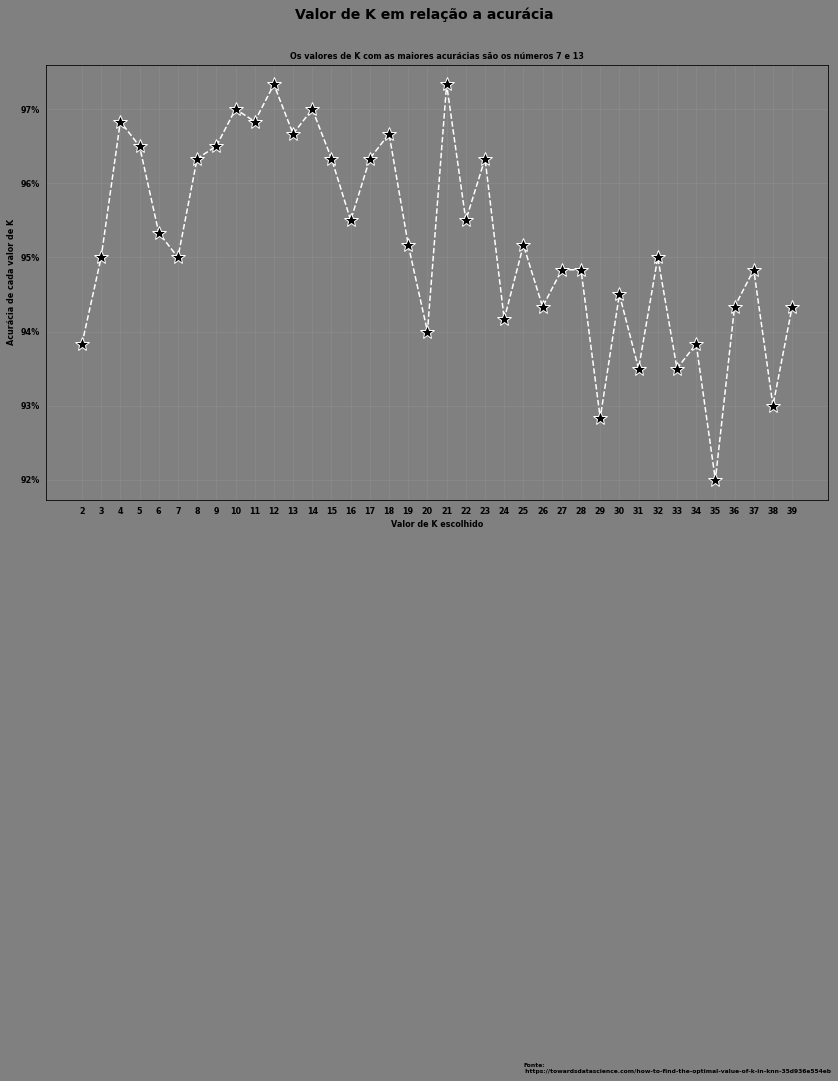

In [289]:
medias_acuracia = []
n = 20
for k in range(2,40):
    acuracia = []
    for i in range (n):
        X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state = None)
        testeK = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
        y_predTeste = testeK.predict(X_test)
        acuracia.append(metrics.accuracy_score(y_test, y_predTeste))
    medias_acuracia.append((sum(acuracia) / len(acuracia)))


print(acuracia)

plt.figure(figsize=(14, 8), facecolor = "grey")  
plt.plot(range(2,40), medias_acuracia, color = 'white', linestyle='dashed', marker = '*', markerfacecolor = 'black', markersize = 14)
plt.suptitle(titulo, size = '14', fontweight = "bold", fontname = "sans")
plt.title(subtitle_titulo, size = '8', fontweight = "bold", fontname = "sans")
plt.xticks(range(2,40), fontsize = 8, fontweight = "bold")
plt.yticks(fontsize = 8, fontweight = "bold")
plt.xlabel('Valor de K escolhido', fontname="Sans", size='8',fontweight="bold")
plt.ylabel('Acurácia de cada valor de K', fontname="Sans", size='8',fontweight="bold")
plt.text(25, 0.84, 'Fonte:\n https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb', size = '6', fontweight = "bold")
plt.tick_params(bottom=False)
plt.tick_params(left=False)
plt.grid(alpha = .2)

ax = plt.gca()
ax.set_facecolor('grey')
ax.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
